# Titanic Deep Dive

This notebook explores survival data on Titanic. Data source: https://www.kaggle.com/c/titanic/data

Let's first install neccessary dependencies.

In [2]:
import pandas as pd
from pandas import Series, DataFrame

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

Read data from csv file and store as pandas DataFrame.

In [3]:
train_df = pd.read_csv('train.csv', header=0, dtype={'Age': np.float64}, )
test_df = pd.read_csv('test.csv', header=0, dtype={'Age': np.float64}, )

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("****Basic informations for train set****")
train_df.info()
train_df.describe()

print("\n\n\n\n****Basic informations for test set****")
test_df.info()
test_df.describe()

****Basic informations for train set****
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB




****Basic informations for test set****
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          41

/Users/diwu/Envs/default/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,NaN,0.000000,0.000000,NaN
50%,1100.500000,3.000000,NaN,0.000000,0.000000,NaN
75%,1204.750000,3.000000,NaN,1.000000,0.000000,NaN
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
def _drop_unnecessary_cols(df):
    return df.drop(['Name', 'Ticket', 'PassengerId', ], axis=1)

train_df = _drop_unnecessary_cols(train_df)
test_df = _drop_unnecessary_cols(test_df)

`train_df` misses two values for `Embarked`. Let's make it up by filling with most common value.

Before fill in
count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object


After fill in
count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object


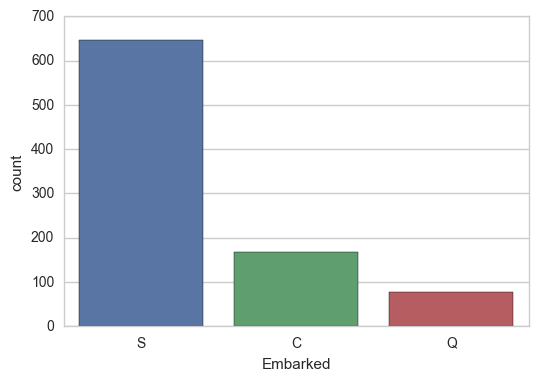

In [6]:
print('Before fill in')
print(train_df.Embarked.describe())

train_df.Embarked = train_df.Embarked.fillna('S')

print('\n\nAfter fill in')
print(train_df.Embarked.describe())

sns.countplot(data=train_df, x="Embarked", )

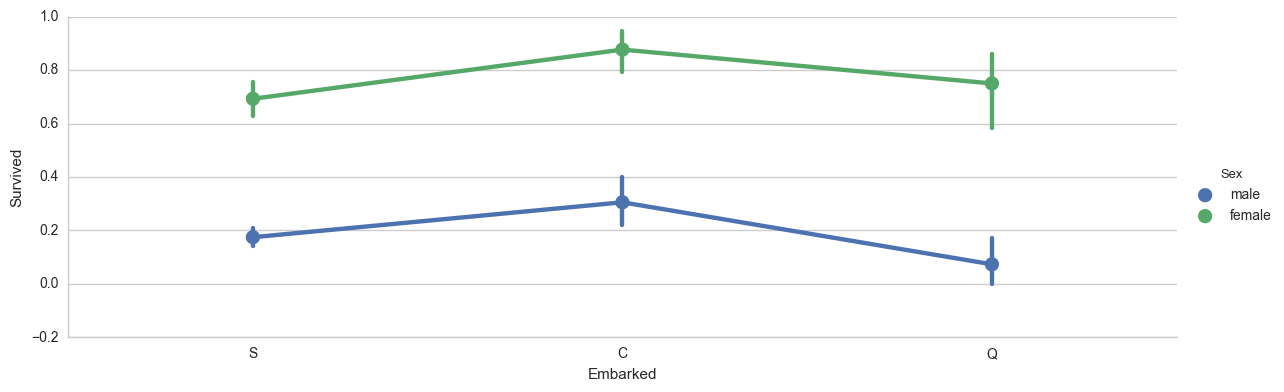

In [8]:
sns.factorplot('Embarked', 'Survived', data=train_df, size=4, aspect=3, hue='Sex',)

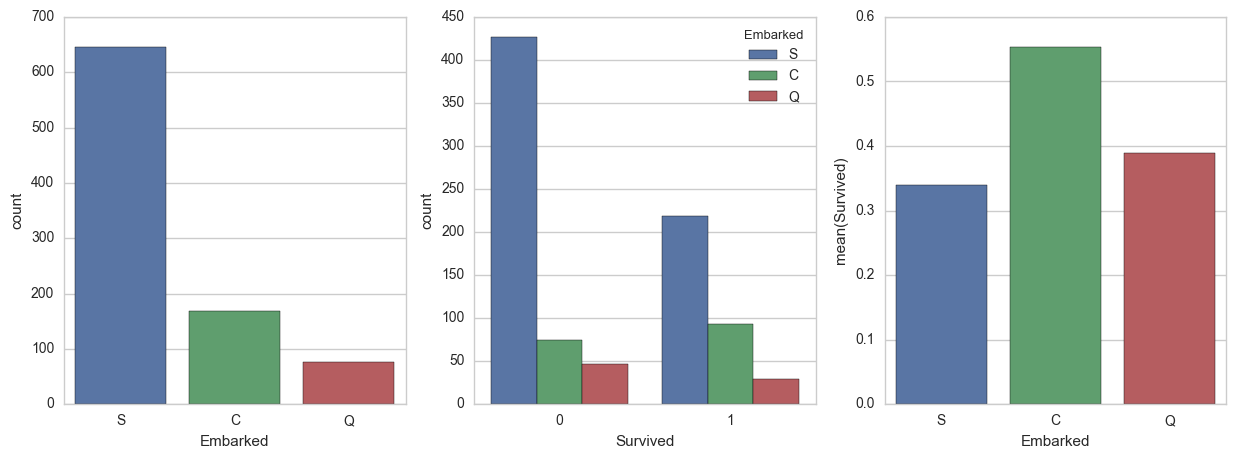

In [13]:
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(15, 5, ))
sns.countplot(x='Embarked', data=train_df, ax=axis1)
sns.countplot(x='Survived', hue='Embarked', data=train_df, ax=axis2, )

embark_perc = train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc, order=['S', 'C', 'Q', ], ax=axis3)